### <span style="color:darkblue"> Lab Assignement 2: Exploratory Data Analysis </span>
- due Friday, October 13 @1:15PM
- post to your Google Drive folder using the file name: LASTNAME_lab2.ipynb

#### TYPE YOUR FULL NAME HERE: 

Riva Lam


##### Grade (to be entered by TA):

---
### <span style="color:darkblue"> Question 1.

(MDSR Exercise 4.2) Use the nycflights package and the flights data frame to answer the following questions: What month had the highest proportion of cancelled flights?  What month had the lowest?  Interpret seasonal patterns.
#### SOLUTION:

In [1]:
library(mdsr)
library(dplyr)
library(ggplot2)
library(nycflights13)
DEP_TIME_NAS<-subset(flights, is.na(dep_time))
tally(DEP_TIME_NAS%>% group_by(origin))
GROUPINGCANCELLEDBYMONTHS<-tally(DEP_TIME_NAS%>% group_by(month))
HIGHTOLOW<-GROUPINGCANCELLEDBYMONTHS%>%arrange(desc(n))
sum(HIGHTOLOW$n)
mutate(HIGHTOLOW,prop=n/sum(HIGHTOLOW$n))%>%arrange(desc(month))




# I was scheduled to depart at 1/1/2013 at 5:15, but I actually left at 5:17.
# There was a two minute delay for the departure time. 
#I was scheduled to arrive at 8:19 pm but I actually arrived at 8:30 pm.
#There was 11 minutes of delay for arrival time. 
#Hour and min is just: 5:15.






Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats
Loading required package: lattice
Loading required package: ggformula

New to ggformula?  Try the tutorials: 
	learnr::run_tutorial("introduction", package = "ggformula")
	learnr::run_tutorial("refining", package = "ggformula")
Loading required package: mosaicData
Loading required package: Matrix

Attaching package: ‘Matrix’

The following object is masked from ‘package:tidyr’:

    expand


The 'mosaic' package masks several functions from core packages in order to add 
additional features.  The original behavior of these functions should not be affected by this.

Note: If you use the Matrix package, be sure to load it BEFORE loading mosaic.


origin,n
EWR,3239
JFK,1863
LGA,3153


[1] 8255

month,n,prop
12,1025,0.12416717
11,233,0.02822532
10,236,0.02858873
9,452,0.05475469
8,486,0.05887341
7,940,0.11387038
6,1009,0.12222895
5,563,0.06820109
4,668,0.08092065
3,861,0.10430042


#### Solution in words goes here

February has the highest propotion of cancelled flights (prop = 0.15275591) , while November has the lowest proportion of flights (prop=0.02822532). Fall consists of September, October, November. Winter is December, January, and February. Spring is March,April, May. 

For spring (March, April, May), the greatest number of cancellations is in March but that number decreases as the months progress. For summer (June, July, August), the greatest number of cancellations begins with June but that decreases over the next two months. For Fall(September, October, November), the greatest number of cancellations is in September but as the season progresses the number decreases. For winter (December, January, February), the highest number of cancellations is in the last month of the season. Based on the data, it seems that the greatest number of cancellations for each season is in the initial month especially for spring, fall, and autumn. Winter is the exception where the initial month of the season does not have the greatest. 


---
### <span style="color:darkblue"> Question 2.

(MDSR Exercise 4.3) Use the nycflights package and the flights data frame to answer the following questions: What plane (specified bt the tailnum variable) traveled the most times from NYC airports in 2013? Plot the number of trips per week over the year for this plane.

#### SOLUTION:

In [90]:
library(nycflights13)
library(dplyr)
library(lubridate)
Only2013<-filter(flights,year==2013)
NYAIRPORTS<-filter(Only2013,origin %in% c("JFK","LGA","EWR")) #Considering Cancelled Flights
ONLYAVAILABLEFLIGHTS<-filter(NYAIRPORTS,!is.na(dep_time))
tally(ONLYAVAILABLEFLIGHTS%>%group_by(origin))



#EWR = New wark, New Jersey
#JFK = NY
#LGA = QUEENS, NY

origin,n
EWR,117596
JFK,109416
LGA,101509


In [91]:
#Considering cancelled flights
NYAIRPORTS<-filter(Only2013,origin %in% c("JFK","LGA","EWR"))
CANCELLEDNY<-subset(NYAIRPORTS, !is.na(dep_time))
WITHOUTNA<-tally(CANCELLEDNY%>% group_by(tailnum))
WITHOUTNA%>%arrange(desc(n))

tailnum,n
N725MQ,546
N722MQ,487
N723MQ,480
N711MQ,467
N713MQ,455
N258JB,422
N353JB,403
N298JB,402
N351JB,392
N328AA,389


#### Solution in words goes here
Tailnum N725MQ has travelled the most times from NYC airports in 2013.

In [138]:
# Plot the number of trips per week over the year for this plane.
#Considering Cancelled Flights
Only2013<-filter(flights,year==2013)
NYAIRPORTS<-filter(Only2013,origin %in% c("JFK","LGA","EWR"))
ONLYAVAILABLEFLIGHTS<-filter(NYAIRPORTS,!is.na(dep_time))
ONLYN725MQ<-filter(NYAIRPORTS,tailnum=="N725MQ")
Weeks_For_NY25MQ<-(ONLYN725MQ %>% mutate(week = week(time_hour)))
WeeksForNY25MQ<-count(Weeks_For_NY25MQ, week)
WeeksForNY25MQ
#ggplot(WeeksForNY25MQ,(aes(x=week,y=n)))+geom_line()+ggtitle("N725MQ Flights for 2013")+
#ylab("Number of Trips")







week,n
1,17
2,14
3,16
4,12
5,12
6,15
7,9
8,20
9,17
10,18


---
### <span style="color:darkblue"> Question 3.

(MDSR Exercise 4.4) Use the nycflights13 package and the flights and planes tables to answer the fol- lowing questions: What is the oldest plane (specified by the tailnum variable) that flew from New York City airports in 2013? How many airplanes that flew from New York City are included in the planes table?

#### SOLUTION:


In [100]:
#What is the oldest plane (specified by the tailnum variable) that flew 
#from New York City airports in 2013? 
library(nycflights13)
library(dplyr)
library(ggplot2)
NYAIRPORTS<-filter(Only2013,origin %in% c("JFK","LGA","EWR")) #Cancelled Flights
CANCELLEDNY<-subset(NYAIRPORTS, !is.na(dep_time))
NEWCOLUMNS2<-subset(CANCELLEDNY,select=-c(month,day, dep_time, sched_dep_time,
            arr_time,sched_arr_time, arr_delay, hour, minute,distance,dep_delay )) 
CANCELLEDMERGE<-merge(NEWCOLUMNS2,planes,by="tailnum")
NONAFORYEAR2<-subset(CANCELLEDMERGE, !is.na(year.y))
LAST_TWOROWS<-NONAFORYEAR2 %>%arrange(desc(year.y))
LAST_TWOROWS
tail(LAST_TWOROWS,2)








tailnum,year.x,carrier,flight,origin,dest,air_time,time_hour,year.y,type,manufacturer,model,engines,seats,speed,engine
N150UW,2013,US,1431,EWR,CLT,68,2013-06-15 05:00:00,2013,Fixed wing multi engine,AIRBUS,A321-211,2,199,NA,Turbo-fan
N150UW,2013,US,1995,LGA,CLT,81,2013-08-27 14:00:00,2013,Fixed wing multi engine,AIRBUS,A321-211,2,199,NA,Turbo-fan
N150UW,2013,US,1625,LGA,CLT,90,2013-05-13 11:00:00,2013,Fixed wing multi engine,AIRBUS,A321-211,2,199,NA,Turbo-fan
N150UW,2013,US,1621,EWR,CLT,92,2013-04-23 06:00:00,2013,Fixed wing multi engine,AIRBUS,A321-211,2,199,NA,Turbo-fan
N150UW,2013,US,802,EWR,CLT,79,2013-09-23 15:00:00,2013,Fixed wing multi engine,AIRBUS,A321-211,2,199,NA,Turbo-fan
N150UW,2013,US,1973,EWR,CLT,98,2013-04-04 18:00:00,2013,Fixed wing multi engine,AIRBUS,A321-211,2,199,NA,Turbo-fan
N150UW,2013,US,1507,EWR,CLT,76,2013-04-09 06:00:00,2013,Fixed wing multi engine,AIRBUS,A321-211,2,199,NA,Turbo-fan
N150UW,2013,US,1459,LGA,CLT,83,2013-04-03 12:00:00,2013,Fixed wing multi engine,AIRBUS,A321-211,2,199,NA,Turbo-fan
N150UW,2013,US,1995,LGA,CLT,82,2013-10-27 14:00:00,2013,Fixed wing multi engine,AIRBUS,A321-211,2,199,NA,Turbo-fan
N150UW,2013,US,1733,LGA,CLT,80,2013-04-10 07:00:00,2013,Fixed wing multi engine,AIRBUS,A321-211,2,199,NA,Turbo-fan


,tailnum,year.x,carrier,flight,origin,dest,air_time,time_hour,year.y,type,manufacturer,model,engines,seats,speed,engine
274795,N381AA,2013,AA,85,JFK,SFO,345,2013-10-07 15:00:00,1956,Fixed wing multi engine,DOUGLAS,DC-7BF,4,102,232,Reciprocating
274796,N381AA,2013,AA,59,JFK,SFO,350,2013-01-30 07:00:00,1956,Fixed wing multi engine,DOUGLAS,DC-7BF,4,102,232,Reciprocating


In [122]:
#How many airplanes that flew from New York City are included in the planes table?
library(nycflights13)
library(dplyr)
library(ggplot2)
Only2013<-filter(flights,year==2013)
NYAIRPORTS<-filter(Only2013,origin %in% c("JFK","LGA","EWR")) #Cancelled Flights
CANCELLEDNY<-subset(NYAIRPORTS, !is.na(dep_time)) #Looking at only non-cancelled flights
#CANCELLEDNY2<-subset(CANCELLEDNY,!is.na(tailnum)) 
CANCELLEDMERGE<-merge(CANCELLEDNY,planes,by="tailnum") #merging by tailnum. 
dim(count(CANCELLEDMERGE,tailnum))
dim(count(planes,tailnum))

[1] 3316    2

[1] 3322    2

#### Solution in words goes here

The oldest airplane specified by tail number is N381AA. The plane was manufactured in 1956. 3316 airplanes flew from New York City are included in the planes table.


---
### <span style="color:darkblue"> Question 4.

(MDSR Exercise 4.6) Use the nycflights13 package and the weather table to answer the following questions: What is the distribution of temperature in July, 2013? Identify any important outliers in terms of the wind speed variable. What is the relationship between dewp and humid? What is the relationship between precip and visib?

#### SOLUTION:


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   6.905   9.206   9.471  12.660  25.320       2 

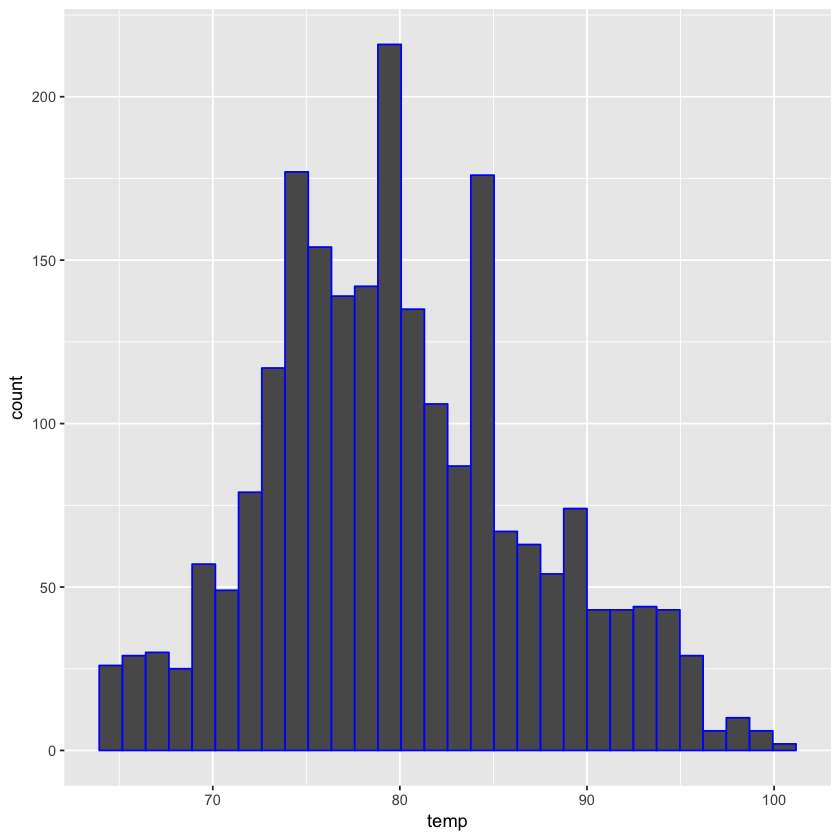

[1] 21.86482 24.16638 25.31716

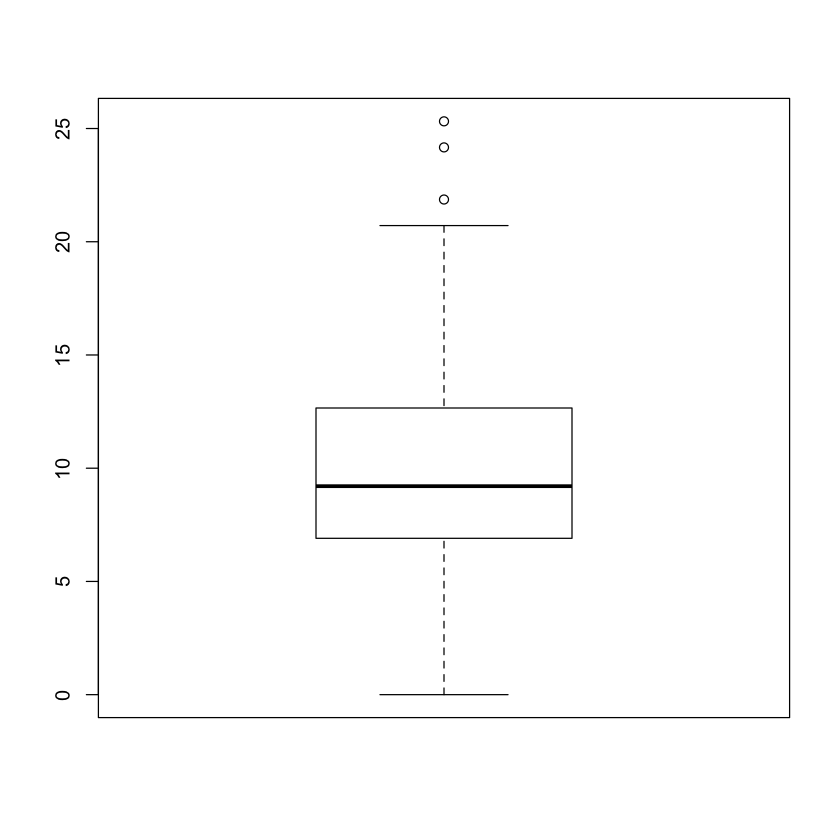

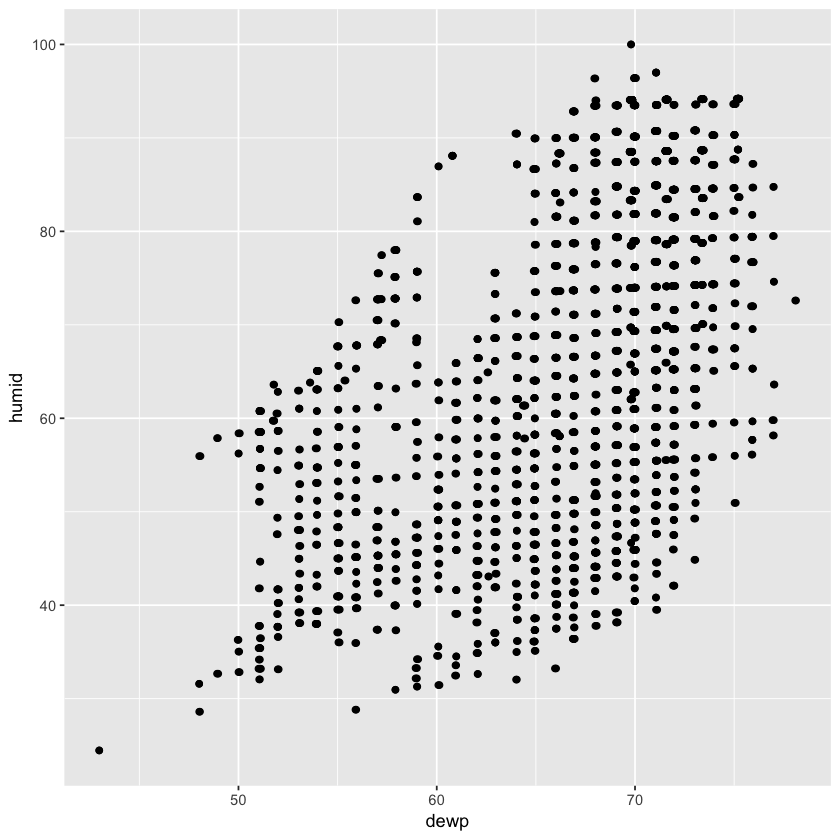

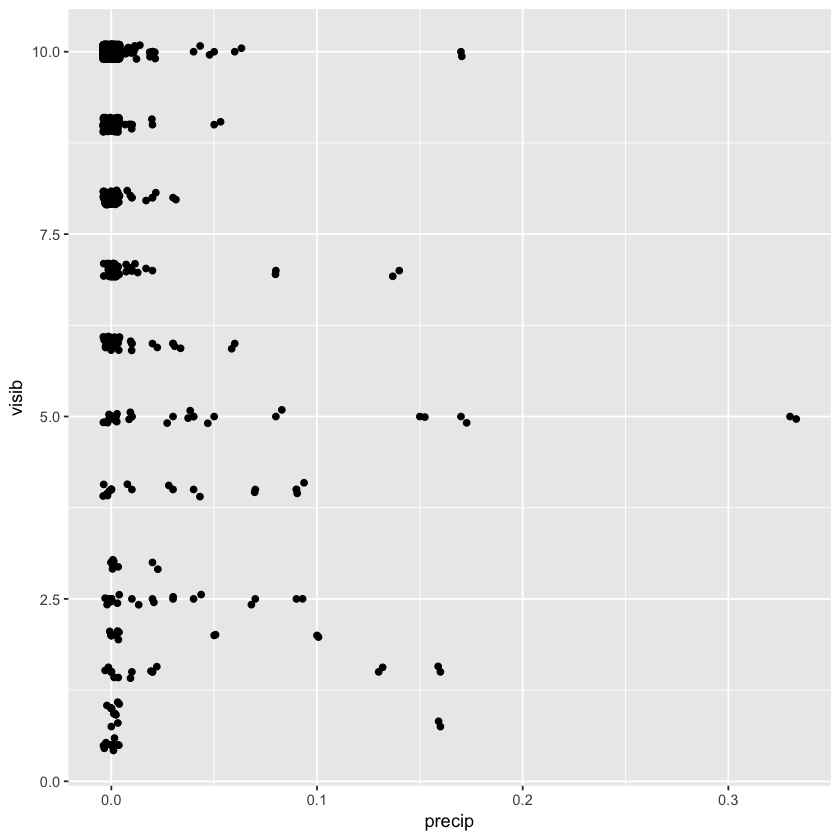

In [131]:
library(nycflights13)
library(ggplot2)

#What is the distribution of temperature in July 2013?
JULY2013<-filter(weather,month==7)
ggplot(JULY2013, aes(x=temp)) + geom_histogram(col="blue") #adjust binwidth

#Identify any important outliers in terms of the wind speed variable.
summary(JULY2013$wind_speed)
BOXPLOT_WIND<-boxplot(JULY2013$wind_speed)
BOXPLOT_WIND$out ## it will print the values of the outliers



#What is the relationship between dewp and humid?
ggplot(JULY2013,aes(x=dewp,y=humid))+geom_point()+geom_jitter()

# What is the relationship between precip and visib?
JULY2013<-filter(weather,month==7)
ggplot(JULY2013,aes(x=precip,y=visib))+geom_point()+geom_jitter()



#### Solution in words goes here
What is the distribution of temperature in July, 2013? 

The distribution of temperature in July 2013 looks approximately normal. 

Identify any important outliers in terms of the wind speed variable. 

The outliers are 21.86482, 24.16638, and 25.31716.

What is the relationship between dewp and humid? 

There appears to be a positive relation between dep and humid. 

What is the relationship between precip and visib?
The relationship between precip and visib based on the scatterplot is that there is usually 0 precip but the visibility greatly varies as indicated by the wide spread of data points (vertically) at and along 0. The spread for visbility is less than 1.25 but a little more than 10 at precip=0. There are less instances where precip is greater than .1 This suggests that with little precipitation there is greater visibility. With increase in precipitation,visibility decreases. However, it seems that most of the time, there is almost no (0) precipitation to about .1 precipitation. It appears that this graph might require a transformation to help improve the interpretability and appearance.


In [137]:
subset(planes, is.na(year))

tailnum,year,type,manufacturer,model,engines,seats,speed,engine
N14558,NA,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NA,Turbo-fan
N15555,NA,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NA,Turbo-fan
N15574,NA,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NA,Turbo-fan
N174US,NA,Fixed wing multi engine,AIRBUS INDUSTRIE,A321-211,2,199,NA,Turbo-jet
N177US,NA,Fixed wing multi engine,AIRBUS INDUSTRIE,A321-211,2,199,NA,Turbo-jet
N181UW,NA,Fixed wing multi engine,AIRBUS INDUSTRIE,A321-211,2,199,NA,Turbo-jet
N18557,NA,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NA,Turbo-fan
N194UW,NA,Fixed wing multi engine,AIRBUS,A321-211,2,199,NA,Turbo-fan
N238JB,NA,Fixed wing multi engine,EMBRAER,ERJ 190-100 IGW,2,20,NA,Turbo-fan
N271LV,NA,Fixed wing multi engine,BOEING,737-705,2,149,NA,Turbo-fan
